In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
df  = pd.read_csv("data/nyc_train_validate.csv")

In [3]:
df[df['education']==-9998]

,id,person_id,trip_n,travel_date,travel_date_dow,o_purpose_category,d_purpose_category,num_non_hh_travelers,num_hh_travelers,num_travelers,...,rent_own,income_aggregate,num_people,num_adults,num_kids,num_workers,num_students,disability,trip_distance,mode
386,386,16,0,03/06/2019,1,1,6,0,2,2,...,1,-9998,6,5,1,2,2,none,0.4,walk
387,387,16,1,03/06/2019,1,6,6,0,2,2,...,1,-9998,6,5,1,2,2,none,0.9,walk
388,388,16,2,03/06/2019,1,6,1,0,2,2,...,1,-9998,6,5,1,2,2,none,0.4,walk
389,389,16,3,05/06/2019,3,1,4,0,1,1,...,1,-9998,6,5,1,2,2,none,15.5,subway
390,390,16,4,05/06/2019,3,4,10,0,1,1,...,1,-9998,6,5,1,2,2,none,1.4,subway
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39292,39292,1786,16,12/06/2019,3,5,10,0,3,3,...,1,1,5,2,3,2,3,none,1.8,bus
39293,39293,1786,17,12/06/2019,3,1,7,0,2,2,...,1,1,5,2,3,2,3,none,0.5,drive
39294,39294,1786,18,12/06/2019,3,7,1,0,2,2,...,1,1,5,2,3,2,3,none,0.6,drive
39295,39295,1786,19,13/06/2019,4,1,5,0,4,4,...,1,1,5,2,3,2,3,none,2.3,drive


In [4]:
df.head()

,id,person_id,trip_n,travel_date,travel_date_dow,o_purpose_category,d_purpose_category,num_non_hh_travelers,num_hh_travelers,num_travelers,...,rent_own,income_aggregate,num_people,num_adults,num_kids,num_workers,num_students,disability,trip_distance,mode
0,0,0,0,30/05/2019,4,-9998,2,0,1,1,...,2,4,5,3,2,1,2,none,13.4,subway
1,1,0,1,01/06/2019,6,-9998,1,0,1,1,...,2,4,5,3,2,1,2,none,3.7,drive
2,2,0,2,02/06/2019,7,-9998,7,1,2,3,...,2,4,5,3,2,1,2,none,9.8,drive
3,3,0,3,02/06/2019,7,7,7,1,2,3,...,2,4,5,3,2,1,2,none,11.1,drive
4,4,0,4,03/06/2019,1,-9998,7,0,1,1,...,2,4,5,3,2,1,2,none,2.5,drive


In [5]:
df.iloc[:,:10].describe()

,id,person_id,trip_n,travel_date_dow,o_purpose_category,d_purpose_category,num_non_hh_travelers,num_hh_travelers,num_travelers
count,39498.000000,39498.000000,39498.000000,39498.000000,39498.000000,39498.000000,39498.00000,39498.000000,39498.000000
mean,19748.500000,861.719429,17.274292,4.018609,-316.214897,5.368373,0.35141,1.313636,1.665046
std,11402.234803,656.148005,14.809687,1.968891,1762.552190,3.146506,0.85688,0.685031,1.140758
min,0.000000,-9998.000000,0.000000,1.000000,-9998.000000,1.000000,0.00000,1.000000,1.000000
25%,9874.250000,428.000000,6.000000,2.000000,1.000000,2.000000,0.00000,1.000000,1.000000
50%,19748.500000,850.000000,14.000000,4.000000,5.000000,6.000000,0.00000,1.000000,1.000000
75%,29622.750000,1326.000000,25.000000,6.000000,7.000000,8.000000,0.00000,1.000000,2.000000
max,39497.000000,1794.000000,118.000000,7.000000,10.000000,10.000000,5.00000,7.000000,12.000000


In [6]:
df.iloc[:,10:21].describe()

,o_location_type,d_location_type,o_congestion,d_congestion,age,employment,student,license,planning_apps,industry,gender
count,39498.000000,39498.000000,39498.000000,39498.000000,39498.000000,39498.000000,39498.000000,39498.000000,39498.000000,39498.000000,39498.000000
mean,3.045825,3.186921,0.157173,0.123930,6.406223,2.381842,0.145349,-204.958605,-428.397691,-1976.193098,-187.878981
std,1.329779,1.276049,0.363968,0.329506,1.465170,2.069305,0.451135,1419.701606,2033.242731,3991.399210,1362.996812
min,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,-9998.000000,-9998.000000,-9998.000000,-9998.000000
25%,1.000000,2.000000,0.000000,0.000000,5.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,4.000000,4.000000,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,4.000000,8.000000,1.000000
75%,4.000000,4.000000,0.000000,0.000000,8.000000,3.000000,0.000000,1.000000,5.000000,13.000000,2.000000
max,4.000000,4.000000,1.000000,1.000000,11.000000,7.000000,2.000000,1.000000,8.000000,18.000000,4.000000


In [7]:
df.iloc[:,21:].describe()

,education,num_bicycles,num_vehicles,res_type,rent_own,income_aggregate,num_people,num_adults,num_kids,num_workers,num_students,trip_distance
count,39498.000000,39498.000000,39498.000000,39498.000000,39498.000000,39498.000000,39498.000000,39498.000000,39498.000000,39498.000000,39498.000000,39498.000000
mean,-703.670616,0.864449,0.801256,-522.393109,-1021.436326,-812.037141,2.635804,2.098638,0.537166,1.546737,0.724771,2.576781
std,2566.835270,1.210342,0.865603,2233.540480,3030.463449,2737.221440,1.437528,1.007777,0.906857,0.948295,1.020575,3.627625
min,-9998.000000,0.000000,0.000000,-9998.000000,-9998.000000,-9998.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.100000
25%,3.000000,0.000000,0.000000,2.000000,1.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.300000
50%,6.000000,0.000000,1.000000,5.000000,2.000000,3.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.900000
75%,7.000000,1.000000,1.000000,6.000000,2.000000,5.000000,4.000000,2.000000,1.000000,2.000000,1.000000,3.300000
max,7.000000,8.000000,5.000000,9.000000,3.000000,6.000000,11.000000,8.000000,7.000000,6.000000,7.000000,20.000000


In [8]:
# delete rows without personid (54)
df = df[df['person_id']!=-9998]

## o_purpose_category

In [9]:
def process_o_purpose_category(df, row):
    '''
    impute by trips with the same person_id, travel date of week, d_purpose_category; otherwise, impute with all data by probability
    '''
    if row['o_purpose_category'] >= 0:
        return row['o_purpose_category']
    
    temp = df[(df['person_id']==row['person_id'])&\
              (df['travel_date_dow']==row['travel_date_dow'])&\
              (df['d_purpose_category']==row['d_purpose_category'])&\
              (df['o_purpose_category']!=-9998)]
    
    if temp.empty:
        o_purpose = df[(df['travel_date_dow']==row['travel_date_dow'])&\
                  (df['d_purpose_category']==row['d_purpose_category'])&\
                   (df['o_purpose_category']!=-9998)]['o_purpose_category']
        
        percentage = o_purpose.value_counts().cumsum() / o_purpose.value_counts().sum()
        random_number = random.uniform(0, 1)

        return percentage[percentage>random_number].index[0]
    
    return temp['o_purpose_category'].mode()[0]

In [10]:
random.seed(42)
df['o_purpose_category'] = df.apply(lambda x:process_o_purpose_category(df,x), axis=1)

In [11]:
df[df['o_purpose_category'].isna()]

,id,person_id,trip_n,travel_date,travel_date_dow,o_purpose_category,d_purpose_category,num_non_hh_travelers,num_hh_travelers,num_travelers,...,rent_own,income_aggregate,num_people,num_adults,num_kids,num_workers,num_students,disability,trip_distance,mode


## gender

In [12]:
gender = df[df['gender']!=-9998]['gender']
gender = gender.value_counts().cumsum() / gender.value_counts().sum()
def process_gender(df, row):
    if row['gender'] >= 0:
        return row['gender']
    random_number = random.uniform(0, 1)
    return gender[gender>random_number].index[0]

In [13]:
random.seed(42)
df['gender'] = df.apply(lambda x:process_gender(df,x), axis=1)

## license

In [14]:
def process_license(df, row):
    if row['license'] >= 0:
        return row['license']

    temp = df[(df['person_id']==row['person_id'])&\
              (df['license']!=-9998)]
    
    if temp.empty:
        license = df[(df['age']==row['age'])&\
                  (df['gender']==row['gender'])&\
                  (df['license']!=-9998)]['license']
        if license.empty:
            license = df[(df['age']==row['age'])&\
                      (df['license']!=-9998)]['license']
            
        percentage = license.value_counts().cumsum() / license.value_counts().sum()
        random_number = random.uniform(0, 1)
        return percentage[percentage>random_number].index[0]
    
    return temp['license'].mode()[0]    

In [15]:
random.seed(42)
df['license'] = df.apply(lambda x:process_license(df,x), axis=1)

In [16]:
df[df['license'].isna()]

,id,person_id,trip_n,travel_date,travel_date_dow,o_purpose_category,d_purpose_category,num_non_hh_travelers,num_hh_travelers,num_travelers,...,rent_own,income_aggregate,num_people,num_adults,num_kids,num_workers,num_students,disability,trip_distance,mode


## education

In [17]:
education = df[df['education']!=-9998]['education']
education = education.value_counts().cumsum() / education.value_counts().sum()
def process_education(df, row):
    if row['education'] >= 0:
        return row['education']
    random_number = random.uniform(0, 1)
    return education[education>=random_number].index[0]

In [18]:
random.seed(42)
df['education'] = df.apply(lambda x:process_education(df,x), axis=1)

## industry

In [19]:
#df['industry'] = df['industry'].replace([1,2,3,4,5,7,8,9,10,11,13,14,15,16,17], 18)

In [20]:
industry = df[df['industry']!=-9998]['industry']
industry = industry.value_counts().cumsum() / industry.value_counts().sum()
def process_industry(df, row):
    if row['industry'] >= 0:
        return row['industry']
    random_number = random.uniform(0, 1)
    return industry[industry>=random_number].index[0]

In [21]:
random.seed(42)
df['industry'] = df.apply(lambda x:process_industry(df,x), axis=1)

## income

In [22]:
def process_income(df, row):
    if row['income_aggregate'] >= 0:
        return row['income_aggregate']

    income = df[(df['age']==row['age'])&\
          (df['gender']==row['gender'])&\
          (df['education']==row['education'])&\
          (df['industry']==row['industry'])&\
          (df['income_aggregate']!=-9998)]['income_aggregate']

    
    if income.empty:
        income = df[(df['age']==row['age'])&\
              (df['education']==row['education'])&\
              (df['income_aggregate']!=-9998)]['income_aggregate']
                    
    percentage = income.value_counts().cumsum() / income.value_counts().sum()
    random_number = random.uniform(0, 1)
    return percentage[percentage>random_number].index[0] 

In [23]:
idid = df[df['income_aggregate']==-9998]['person_id'].unique()
df[(df['person_id'].isin(idid))&(df['income_aggregate']!=-9998)]

,id,person_id,trip_n,travel_date,travel_date_dow,o_purpose_category,d_purpose_category,num_non_hh_travelers,num_hh_travelers,num_travelers,...,rent_own,income_aggregate,num_people,num_adults,num_kids,num_workers,num_students,disability,trip_distance,mode


In [24]:
df['income_aggregate'] = df.apply(lambda x:process_income(df,x), axis=1)

## residence type

In [25]:
def process_restype(df, row):
    if row['res_type'] >= 0:
        return row['res_type']

    restype = df[(df['income_aggregate']==row['income_aggregate'])&\
              (df['num_people']==row['num_people'])&\
              (df['res_type']!=-9998)]['res_type']
    
    if restype.empty:
        restype = df[(df['income_aggregate']==row['income_aggregate'])&\
                  (df['res_type']!=-9998)]['res_type']
    
    
    percentage = restype.value_counts().cumsum() / restype.value_counts().sum()
    random_number = random.uniform(0, 1)
    return percentage[percentage>random_number].index[0]      

In [26]:
df['res_type'] = df.apply(lambda x:process_restype(df,x), axis=1)

## trip distance category
Add a column named `trip_distance_category` to categorize the trip distance into three categories 
- short: less than 0.5 miles
- medium: 0.5 to 3 miles
- long: more than 3 miles (up to 100)

In [27]:
import matplotlib.pyplot as plt

def add_trip_distance_category(df):
    
    plot = plt.hist(df['trip_distance'], bins=100)

    df['trip_distance_category'] = pd.cut(df['trip_distance'], bins=[0, 0.5, 3, 100], labels=['short', 'medium', 'long'])

    for length in ['short', 'medium', 'long']:
        print('percentage of {} trips: {:.2f}%'.format(length, 100*sum(df['trip_distance_category'] == length) / len(df)))

percentage of short trips: 38.42%
percentage of medium trips: 35.39%
percentage of long trips: 26.18%


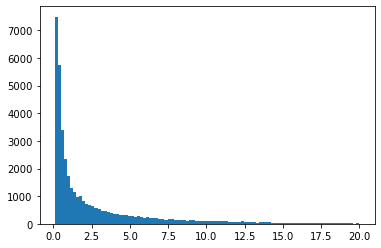

In [28]:
add_trip_distance_category(df)

# Export processed dataframe

In [30]:
df.to_csv('data/data_processed.csv')